# K-Means Clustering



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Importing the dataset

In [3]:
dataset = pd.read_csv('../../../Datasets/mall_customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
dataset = dataset.iloc[:, [3, 4]].values

## Using the elbow method to find the optimal number of clusters

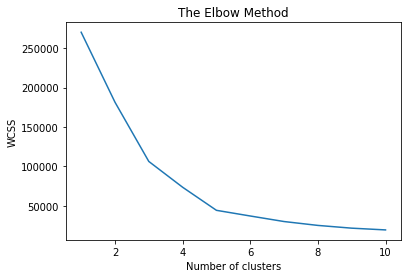

In [8]:
wcss = []
for n_clusters in range(1, 11):
  kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
  kmeans.fit(dataset)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [9]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans_predictions = kmeans.fit_predict(dataset)
kmeans_predictions

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

## Visualizing the clusters

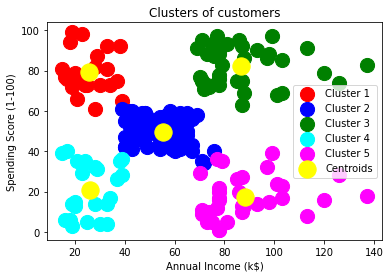

In [12]:
plt.scatter(dataset[kmeans_predictions == 0, 0], dataset[kmeans_predictions == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(dataset[kmeans_predictions == 1, 0], dataset[kmeans_predictions == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(dataset[kmeans_predictions == 2, 0], dataset[kmeans_predictions == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(dataset[kmeans_predictions == 3, 0], dataset[kmeans_predictions == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(dataset[kmeans_predictions == 4, 0], dataset[kmeans_predictions == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Prediction using user input

In [29]:
annual_income = int(input('Enter Annual Income::'))
spending_score = int(input('Enter Spending Score (1-100)::'))

Enter Annual Income::45
Enter Spending Score (1-100)::99


In [30]:
user_sample = [[annual_income, spending_score]]
cluster = kmeans.predict(user_sample)[0]

In [31]:
if cluster == 0:
  print('Red Cluster')
elif cluster == 1:
  print('Blue Cluster')
elif cluster == 2:
  print('Green cluster')
elif cluster == 3:
  print('Cyan cluster')
elif cluster == 4:
  print('Magenda cluster')

Red Cluster
